# 0. Importing the Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import ast
from collections import deque
from datetime import timedelta

# 1. Downloading the Datasets

In [2]:
product_catalog = pd.read_csv("original_data/product_catalog.csv")
product_category = pd.read_csv("original_data/product_category_map.csv")
transactions = pd.read_csv("original_data/transactions.csv")
test = pd.read_csv("original_data/test.csv")

## 1a. Analyzing & Preprocessing the Dataset

Investigating the entities, dtypes, numeric information etc.

### <center> - Transactions - </center>

In [3]:
transactions.head()

,customer_id,product_id,purchase_date,quantity
0,38769,3477,2020-06-01,1
1,42535,30474,2020-06-01,1
2,42535,15833,2020-06-01,1
3,42535,20131,2020-06-01,1
4,42535,4325,2020-06-01,1


In [4]:
# Filter out rows in transactions where customer_id is not in test
transactions = transactions[transactions['customer_id'].isin(test['customer_id'])].reset_index(drop=True)

transactions.head()

,customer_id,product_id,purchase_date,quantity
0,44176,20159,2020-06-01,1
1,39433,197,2020-06-01,1
2,39433,29370,2020-06-01,1
3,3172,9649,2020-06-01,1
4,13085,1509,2020-06-01,1


In [5]:
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])

In [6]:
transactions

,customer_id,product_id,purchase_date,quantity
0,44176,20159,2020-06-01,1
1,39433,197,2020-06-01,1
2,39433,29370,2020-06-01,1
3,3172,9649,2020-06-01,1
4,13085,1509,2020-06-01,1
...,...,...,...,...
273788,36347,17658,2021-01-31,2
273789,17894,21280,2021-01-31,3
273790,17894,31268,2021-01-31,1
273791,10900,18270,2021-01-31,1


In [7]:
transactions.describe()

,customer_id,product_id,purchase_date,quantity
count,273793.000000,273793.000000,273793,273793.000000
mean,23084.185122,16487.366960,2020-10-04 14:57:28.646240256,1.399251
min,0.000000,1.000000,2020-06-01 00:00:00,1.000000
25%,11757.000000,8343.000000,2020-08-04 00:00:00,1.000000
50%,23095.000000,16879.000000,2020-10-05 00:00:00,1.000000
75%,34720.000000,24528.000000,2020-12-06 00:00:00,1.000000
max,46130.000000,32775.000000,2021-01-31 00:00:00,100.000000
std,13245.821228,9433.718025,NaN,1.457499


In [8]:
transactions.isna().sum()

customer_id      0
product_id       0
purchase_date    0
quantity         0
dtype: int64

In [9]:
transactions.dtypes

customer_id               int64
product_id                int64
purchase_date    datetime64[ns]
quantity                  int64
dtype: object

In [10]:
transactions.nunique()

customer_id       7251
product_id       20623
purchase_date      245
quantity            32
dtype: int64

In [11]:
# Sort by customer_id, product_id, and purchase_date
transactions = transactions.sort_values(by=['customer_id', 'product_id', 'purchase_date'])

In [12]:
transactions.head()

,customer_id,product_id,purchase_date,quantity
99920,0,1505,2020-09-01,1
211259,0,6446,2020-12-11,1
251491,0,6446,2021-01-15,1
183150,0,9325,2020-11-20,1
67740,0,12468,2020-08-03,1


In [13]:
unique_customers = transactions['customer_id'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 7251


In [14]:
clustered_products = pd.read_csv("updated_product_catalog.csv")
clustered_products.head()
clustered_products

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,categories_length,parent_categories,combined_categories,cluster
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]",4,"[2832, 1178, 3898, 3898]","[3908, 3909, 2890, 2832, 855, 1178, 3898]",0
1,28640,1366,10,1,537,0,101,[],0,[],[],1718
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3...",13,"[1420, 3860, 600, 600, 3241, 3241, 3241, 600, ...","[163, 3270, 3912, 3561, 3913, 3595, 12, 3914, ...",1
3,21399,1090,10,1,511,0,0,[3270],1,[1420],"[1420, 3270]",2
4,8504,768,4,1,484,0,66,[2470],1,[2566],"[2470, 2566]",3
...,...,...,...,...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,...",11,"[3860, 458, 458, 458, 458, 322, 600, 600, 600,...","[1088, 322, 2308, 3688, 3241, 458, 12, 3502, 6...",6893
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]",8,"[3898, 3898, 3898, 3898, 1072, 2920, 2475, 3565]","[3905, 3910, 2920, 2475, 3565, 1807, 1072, 274...",9391
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]",3,"[2917, 1175, 725, 1735]","[2917, 1735, 2609, 725, 1175, 2686]",9392
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]",6,"[3898, 3898, 3898, 2566, 3565, 2920]","[3910, 2566, 2920, 2473, 3565, 914, 274, 3898,...",9393


In [15]:
merged_df = transactions.merge(clustered_products[['product_id', 'cluster']], on='product_id', how='left')

# Dropping the original product_id column and renaming cluster as cluster_id
merged_df = merged_df.rename(columns={'cluster': 'cluster_id'})

merged_df

,customer_id,product_id,purchase_date,quantity,cluster_id
0,0,1505,2020-09-01,1,1449
1,0,6446,2020-12-11,1,822
2,0,6446,2021-01-15,1,822
3,0,9325,2020-11-20,1,9110
4,0,12468,2020-08-03,1,389
...,...,...,...,...,...
273788,46130,29288,2020-11-28,1,2658
273789,46130,29499,2020-11-28,1,3396
273790,46130,29995,2020-12-10,1,2357
273791,46130,30712,2020-08-19,1,8903


In [17]:
# Sort by customer_id, product_id, and purchase_date
merged_df = merged_df.sort_values(by=['customer_id', 'cluster_id', 'purchase_date'])

In [18]:
merged_df.drop(columns=['product_id'], inplace=True)

In [19]:
merged_df['next_purchase_date'] = merged_df.groupby(['customer_id', 'cluster_id'])['purchase_date'].shift(-1)
# merged_df['next_purchase_date'] = merged_df.groupby(['customer_id', 'product_id'])['purchase_date'].shift(-1)
merged_df

,customer_id,purchase_date,quantity,cluster_id,next_purchase_date
0,0,2020-09-01,1,1505,NaT
1,0,2020-12-11,1,6446,2021-01-15
2,0,2021-01-15,1,6446,NaT
3,0,2020-11-20,1,9325,NaT
4,0,2020-08-03,1,12468,NaT
...,...,...,...,...,...
273788,46130,2020-11-28,1,29288,NaT
273789,46130,2020-11-28,1,29499,NaT
273790,46130,2020-12-10,1,29995,NaT
273791,46130,2020-08-19,1,30712,2020-12-10


In [20]:
merged_df['re_purchased_day'] = (((merged_df['next_purchase_date'] - merged_df['purchase_date']).dt.days) / merged_df['quantity']).fillna(0).astype(int)
merged_df.head()

,customer_id,purchase_date,quantity,cluster_id,next_purchase_date,re_purchased_day
0,0,2020-09-01,1,1505,NaT,0
1,0,2020-12-11,1,6446,2021-01-15,35
2,0,2021-01-15,1,6446,NaT,0
3,0,2020-11-20,1,9325,NaT,0
4,0,2020-08-03,1,12468,NaT,0


In [21]:
max_purchase_date = merged_df['purchase_date'].max()

# Calculating the cutoff date (4 weeks before max_purchase_date) to drop
cutoff_date = max_purchase_date - timedelta(weeks=3)

# Filter the last row of each customer-product pair
filtered_transactions = merged_df.sort_values(by=['customer_id', 'cluster_id', 'purchase_date'])
last_rows = filtered_transactions.drop_duplicates(subset=['customer_id', 'cluster_id'], keep='last')
filtered_transactions = filtered_transactions[~filtered_transactions.index.isin(last_rows.index)]

filtered_transactions

,customer_id,purchase_date,quantity,cluster_id,next_purchase_date,re_purchased_day
1,0,2020-12-11,1,6446,2021-01-15,35
8,0,2020-06-05,1,20664,2020-10-09,126
9,0,2020-10-09,1,20664,2020-12-11,63
12,0,2020-11-20,1,28231,2020-12-11,21
13,0,2020-12-11,1,28231,2021-01-25,45
...,...,...,...,...,...,...
273778,46130,2020-11-09,5,20131,2020-12-20,8
273780,46130,2020-10-23,1,22975,2021-01-27,96
273783,46130,2020-08-23,1,23587,2020-12-14,113
273784,46130,2020-12-14,1,23587,2021-01-27,44


In [22]:
new_df = filtered_transactions.drop(columns=['purchase_date', 'next_purchase_date'])
new_df.head()

,customer_id,quantity,cluster_id,re_purchased_day
1,0,1,6446,35
8,0,1,20664,126
9,0,1,20664,63
12,0,1,28231,21
13,0,1,28231,45


In [23]:
new_df[new_df["quantity"] == 1].re_purchased_day.unique()

array([ 35, 126,  63,  21,  45,  78,  68,  55, 201,  40, 111,  37, 203,
       146,  81,  27,  19,  62,  52,  30,  74, 164,  84,  28,  33,  31,
        20,  26, 120,  49, 130,  44,  25,  51,  82, 118, 124,  87,  77,
         9,  46,  12, 176, 169, 155,  66,  70,  98,  85, 110,  36,  23,
        29,  39,  56, 137, 149,   5,  76,  72,  89,  50, 131,  80,  90,
       123,  53,  48,  64, 135, 210, 112,  42, 154,  22,  69,  54, 173,
       181,  32,  59, 104,  17,  34,  11,  60, 178,  10,  95,  94,  86,
       138,  97, 218, 129,  79,  93,  67, 139,  43,   4,  47,  96, 177,
        71,   0,   1, 152, 143,  83, 142,  13,  18,  73,  91, 113,  88,
        92, 117,  99, 185, 116, 171,  57, 114,  75, 109, 127,   7, 107,
       156, 105, 122, 172, 121, 202, 132, 162,  58,  38, 182, 101, 106,
       148, 140, 192, 157,  14,  16, 102, 167,  65, 186, 141, 133, 115,
        15, 197, 159, 100,  61, 134, 205,  24, 160, 213, 211, 147,  41,
       200, 119, 179, 136, 238, 175,   8, 195, 212, 199, 184, 23

In [24]:
# Counting the occurrences of each re_purchased_week value
counts = new_df['re_purchased_day'].value_counts()

# Creating a new DataFrame to include weeks from 0 to 5
re_purchased_df = pd.DataFrame({'re_purchased_day': range(6), 'count': 0})
re_purchased_df.set_index('re_purchased_day', inplace=True)

# Updating the counts for weeks that exist in the data
for week, count in counts.items():
    week = 1 + (week // 7)
    if week in re_purchased_df.index:
        re_purchased_df.at[week, 'count'] = count

    elif week > 5:
        re_purchased_df.at[5, 'count'] += count

# Calculating the percentages
total_counts = re_purchased_df['count'].sum()
re_purchased_df['percentage'] = (re_purchased_df['count'] / total_counts * 100).round(2)

# Resetting index to make it more readable
final_df = re_purchased_df.reset_index()
final_df


,re_purchased_day,count,percentage
0,0,0,0.00
1,1,323,0.73
2,2,826,1.87
3,3,855,1.94
4,4,813,1.84
5,5,41253,93.61


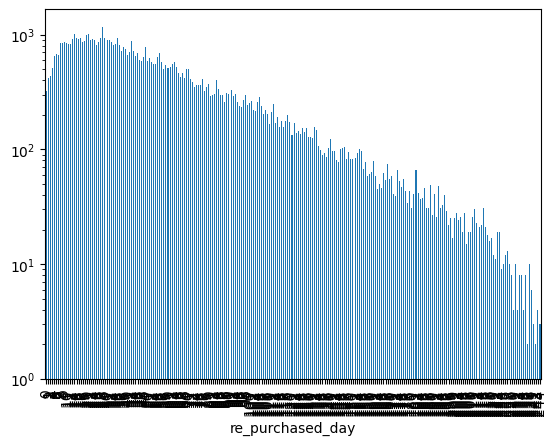

In [25]:
new_df["re_purchased_day"].value_counts().sort_index().plot(kind="bar", log=True);

In [26]:
final_df.describe()

,re_purchased_day,count,percentage
count,6.000000,6.00000,6.000000
mean,2.500000,7345.00000,16.665000
std,1.870829,16615.02006,37.703256
min,0.000000,0.00000,0.000000
25%,1.250000,445.50000,1.007500
50%,2.500000,819.50000,1.855000
75%,3.750000,847.75000,1.922500
max,5.000000,41253.00000,93.610000


# <center> Merging the Datasets </center>

In [27]:
new_df

,customer_id,quantity,cluster_id,re_purchased_day
1,0,1,6446,35
8,0,1,20664,126
9,0,1,20664,63
12,0,1,28231,21
13,0,1,28231,45
...,...,...,...,...
273778,46130,5,20131,8
273780,46130,1,22975,96
273783,46130,1,23587,113
273784,46130,1,23587,44


In [28]:
average_repurchased_day = new_df.groupby(['customer_id', 'cluster_id'])['re_purchased_day'].transform('mean')

# Adding a new column for average_repurchased_day
new_df['average_repurchased_day'] = average_repurchased_day

new_df

,customer_id,quantity,cluster_id,re_purchased_day,average_repurchased_day
1,0,1,6446,35,35.0
8,0,1,20664,126,94.5
9,0,1,20664,63,94.5
12,0,1,28231,21,33.0
13,0,1,28231,45,33.0
...,...,...,...,...,...
273778,46130,5,20131,8,8.0
273780,46130,1,22975,96,96.0
273783,46130,1,23587,113,78.5
273784,46130,1,23587,44,78.5


In [29]:
new_df['total_transactions'] = new_df.groupby('customer_id')['customer_id'].transform('count')
new_df

,customer_id,quantity,cluster_id,re_purchased_day,average_repurchased_day,total_transactions
1,0,1,6446,35,35.0,5
8,0,1,20664,126,94.5,5
9,0,1,20664,63,94.5,5
12,0,1,28231,21,33.0,5
13,0,1,28231,45,33.0,5
...,...,...,...,...,...,...
273778,46130,5,20131,8,8.0,11
273780,46130,1,22975,96,96.0,11
273783,46130,1,23587,113,78.5,11
273784,46130,1,23587,44,78.5,11


In [30]:
new_df['average_unit_per_transaction'] = new_df.groupby('customer_id')['quantity'].transform('mean')
new_df

,customer_id,quantity,cluster_id,re_purchased_day,average_repurchased_day,total_transactions,average_unit_per_transaction
1,0,1,6446,35,35.0,5,1.000000
8,0,1,20664,126,94.5,5,1.000000
9,0,1,20664,63,94.5,5,1.000000
12,0,1,28231,21,33.0,5,1.000000
13,0,1,28231,45,33.0,5,1.000000
...,...,...,...,...,...,...,...
273778,46130,5,20131,8,8.0,11,1.545455
273780,46130,1,22975,96,96.0,11,1.545455
273783,46130,1,23587,113,78.5,11,1.545455
273784,46130,1,23587,44,78.5,11,1.545455


In [31]:
cluster_means = pd.read_csv("cluster_means.csv")

In [32]:
# Merge new_df with cluster_means on the cluster_id column
new_df = new_df.merge(cluster_means, on='cluster_id', how='left')

# Display the updated new_df
new_df.head()

,customer_id,quantity,cluster_id,re_purchased_day,average_repurchased_day,total_transactions,average_unit_per_transaction,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5
0,0,1,6446,35,35.0,5,1.0,6.0,1.2,502.4,0.0,137.0
1,0,1,20664,126,94.5,5,1.0,NaN,NaN,NaN,NaN,NaN
2,0,1,20664,63,94.5,5,1.0,NaN,NaN,NaN,NaN,NaN
3,0,1,28231,21,33.0,5,1.0,NaN,NaN,NaN,NaN,NaN
4,0,1,28231,45,33.0,5,1.0,NaN,NaN,NaN,NaN,NaN


In [33]:
new_df.to_csv("new_df.csv", index=False)

In [34]:
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import root_mean_squared_error, accuracy_score

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor, callback

# Assuming `new_df` is the dataframe loaded already
# Drop ID columns and target variable
X = new_df.drop(columns=['customer_id', 'cluster_id', 're_purchased_day', 'quantity'])
y = new_df['re_purchased_day']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Regressor
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

[0]	validation_0-rmse:43.23475
[1]	validation_0-rmse:39.62979
[2]	validation_0-rmse:36.44188
[3]	validation_0-rmse:33.63703
[4]	validation_0-rmse:31.17443
[5]	validation_0-rmse:31.01931
[6]	validation_0-rmse:28.90399
[7]	validation_0-rmse:27.06348
[8]	validation_0-rmse:25.47674
[9]	validation_0-rmse:25.45098
[10]	validation_0-rmse:25.40163
[11]	validation_0-rmse:24.05525
[12]	validation_0-rmse:22.90556
[13]	validation_0-rmse:21.92128
[14]	validation_0-rmse:21.09066
[15]	validation_0-rmse:20.38808
[16]	validation_0-rmse:19.79880
[17]	validation_0-rmse:19.30854
[18]	validation_0-rmse:18.90259
[19]	validation_0-rmse:18.56749
[20]	validation_0-rmse:18.29027
[21]	validation_0-rmse:18.06280
[22]	validation_0-rmse:18.06440
[23]	validation_0-rmse:17.88074
[24]	validation_0-rmse:17.72324
[25]	validation_0-rmse:17.59423
[26]	validation_0-rmse:17.49119
[27]	validation_0-rmse:17.49427
[28]	validation_0-rmse:17.49923
[29]	validation_0-rmse:17.41678
[30]	validation_0-rmse:17.34828
[31]	validation_0-

In [36]:
# Load the test data
test_data = pd.read_csv("original_data/test.csv")

# Add the cluster_id column for the corresponding products in the row
test_data = test_data.merge(clustered_products[['product_id', 'cluster']], on='product_id', how='left')
test_data = test_data.rename(columns={'cluster': 'cluster_id'})

display(test_data)

,id,customer_id,product_id,prediction,cluster_id
0,0,0,20664,NaN,433
1,1,0,28231,NaN,83
2,2,13,2690,NaN,536
3,3,15,1299,NaN,66
4,4,15,20968,NaN,4383
...,...,...,...,...,...
9995,9995,46118,20106,NaN,171
9996,9996,46124,19677,NaN,6087
9997,9997,46125,12878,NaN,740
9998,9998,46127,7963,NaN,1046


In [37]:

# Add average_repurchased_week for the same customer - cluster pair
test_data = test_data.merge(new_df[['customer_id', 'cluster_id', 'average_repurchased_day']], on=['customer_id', 'cluster_id'], how='left')

test_data.drop_duplicates(subset=['customer_id', 'product_id'], keep='first', inplace=True)

# Add total_transactions corresponding to customer_id
test_data = test_data.merge(new_df[['customer_id', 'total_transactions']], on='customer_id', how='left')

test_data.drop_duplicates(subset=['customer_id', 'product_id'], keep='first', inplace=True)

# # Add average_unit_per_transaction corresponding to customer_id
test_data = test_data.merge(new_df[['customer_id', 'average_unit_per_transaction']], on='customer_id', how='left')

test_data.drop_duplicates(subset=['customer_id', 'product_id'], keep='first', inplace=True)

# Merge new_df with cluster_means on the cluster_id column
test_data = test_data.merge(cluster_means, on='cluster_id', how='left')

# Display the updated new_df
new_df.head()

display(test_data)

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_day,total_transactions,average_unit_per_transaction,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5
0,0,0,20664,NaN,433,NaN,5,1.000000,5.000000,0.722222,365.222222,0.666667,118.777778
1,1,0,28231,NaN,83,NaN,5,1.000000,4.000000,0.647059,429.941176,0.705882,82.352941
2,2,13,2690,NaN,536,NaN,15,1.200000,9.023622,0.779528,477.299213,0.921260,54.740157
3,3,15,1299,NaN,66,NaN,11,1.363636,6.663450,0.635706,476.938480,1.083233,88.165259
4,4,15,20968,NaN,4383,NaN,11,1.363636,4.000000,0.000000,444.000000,0.000000,144.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,46118,20106,NaN,171,NaN,13,1.461538,4.000000,0.500000,491.000000,0.000000,66.000000
9996,9996,46124,19677,NaN,6087,NaN,16,1.000000,4.000000,0.500000,491.000000,3.000000,89.333333
9997,9997,46125,12878,NaN,740,NaN,3,1.000000,4.000000,0.400000,451.800000,0.000000,81.600000
9998,9998,46127,7963,NaN,1046,NaN,6,1.500000,5.959184,0.816327,401.734694,0.918367,80.795918


In [38]:
# Prepare the test features
X_test = test_data.drop(columns=['id', 'customer_id', 'product_id', 'prediction', 'cluster_id'])

# Make predictions on the test data
test_predictions = model.predict(X_test)

# Add predictions to the test data
test_data['prediction'] = test_predictions

# Save the test data with predictions to a new CSV file
test_data.to_csv("test_with_predictions.csv", index=False)

# Display the first few rows of the test data with predictions
test_data.head()

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_day,total_transactions,average_unit_per_transaction,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5
0,0,0,20664,231.445572,433,NaN,5,1.000000,5.000000,0.722222,365.222222,0.666667,118.777778
1,1,0,28231,231.601913,83,NaN,5,1.000000,4.000000,0.647059,429.941176,0.705882,82.352941
2,2,13,2690,233.991760,536,NaN,15,1.200000,9.023622,0.779528,477.299213,0.921260,54.740157
3,3,15,1299,231.586624,66,NaN,11,1.363636,6.663450,0.635706,476.938480,1.083233,88.165259
4,4,15,20968,231.715897,4383,NaN,11,1.363636,4.000000,0.000000,444.000000,0.000000,144.000000


In [39]:
# Create a function to get the last row of each customer-cluster pair
def get_last_row(customer_id, cluster_id):
    group = filtered_transactions[(filtered_transactions['customer_id'] == customer_id) & (filtered_transactions['cluster_id'] == cluster_id)]
    return group.iloc[-1]

# Apply the function to each row in the test_data
test_data['adjusted_next_purchase_date'] = test_data.apply(
    lambda row: 1 + ((timedelta(days=row['average_repurchased_day']) - (pd.Timestamp('2021-02-01') - get_last_row(row['customer_id'], row['cluster_id'])['next_purchase_date'])).days // 7),
    axis=1
)

test_data['purchase_week_in_february'] = test_data.apply(
    lambda row: 1 if row['adjusted_next_purchase_date'] <= 0 else row['adjusted_next_purchase_date'] if row['adjusted_next_purchase_date'] <= 4 else 0,
    axis=1
)



test_data.head()

ValueError: cannot convert float NaN to integer

In [ ]:
test_data['purchase_week_in_february'] = test_data['purchase_week_in_february'].astype(int)

In [ ]:
display(test_data)

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_day,total_transactions,average_unit_per_transaction,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,adjusted_next_purchase_date,purchase_week_in_february
0,0,0,20664,95.623734,433,94.500000,5,1.000000,5.000000,0.722222,365.222222,0.666667,118.777778,7,0
1,1,0,28231,32.531830,83,33.000000,5,1.000000,4.000000,0.647059,429.941176,0.705882,82.352941,4,4
2,2,13,2690,67.488205,536,67.000000,17,1.176471,9.023622,0.779528,477.299213,0.921260,54.740157,5,0
3,3,15,1299,42.324436,66,42.333333,12,1.333333,6.663450,0.635706,476.938480,1.083233,88.165259,4,4
4,4,15,20968,35.357876,4383,36.333333,12,1.333333,4.000000,0.000000,444.000000,0.000000,144.000000,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,46118,20106,42.217598,171,42.250000,14,1.428571,4.000000,0.500000,491.000000,0.000000,66.000000,1,1
9996,9996,46124,19677,34.638737,6087,33.600000,17,1.000000,4.000000,0.500000,491.000000,3.000000,89.333333,4,4
9997,9997,46125,12878,120.778351,740,120.500000,3,1.000000,4.000000,0.400000,451.800000,0.000000,81.600000,18,0
9998,9998,46127,7963,25.143944,1046,25.250000,6,1.500000,5.959184,0.816327,401.734694,0.918367,80.795918,-3,1


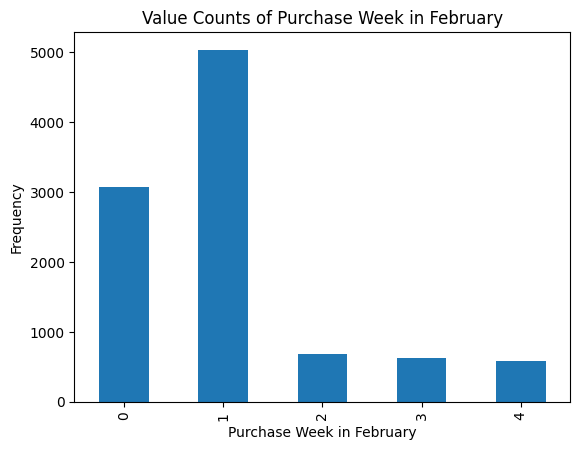

In [ ]:
# Plot the value counts in the purchase_week_in_february column
test_data['purchase_week_in_february'].value_counts().sort_index().plot(kind='bar', title='Value Counts of Purchase Week in February')
plt.xlabel('Purchase Week in February')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Sort the combined_df by id
result_df = test_data.sort_values(by='id')

# Drop columns other than id, customer_id, product_id, subboostmodel_prediction
result_df = result_df[['id', 'customer_id', 'product_id', 'purchase_week_in_february']]

# Rename the subboostmodel_prediction column to prediction
result_df = result_df.rename(columns={'purchase_week_in_february': 'prediction'})

result_df.head()

,id,customer_id,product_id,prediction
0,0,0,20664,0
1,1,0,28231,4
2,2,13,2690,0
3,3,15,1299,4
4,4,15,20968,0


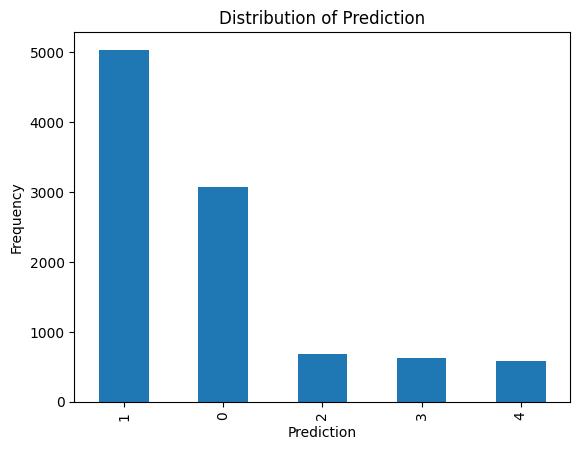

In [ ]:
# Get the distribution of the prediction column
prediction_distribution = result_df['prediction'].value_counts()

# Plot the distribution
prediction_distribution.plot(kind='bar', title='Distribution of Prediction')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()

In [ ]:
result_df.to_csv("result_df.csv", index=False)